## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""

reduce_lr_factor = [0.2, 0.5]
redice_lr_patient = [5, 10]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    
    
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Epoch 10/25
50000/50000 [==============================] - 13s 252us/step - loss: 1.6264 - accuracy: 0.4329 - val_loss: 1.6880 - val_accuracy: 0.4049
Epoch 11/25
50000/50000 [==============================] - 17s 348us/step - loss: 1.6054 - accuracy: 0.4409 - val_loss: 1.6808 - val_accuracy: 0.4053
Epoch 12/25
50000/50000 [==============================] - 19s 379us/step - loss: 1.5869 - accuracy: 0.4462 - val_loss: 1.6678 - val_accuracy: 0.4117
Epoch 13/25
50000/50000 [==============================] - 20s 391us/step - loss: 1.5676 - accuracy: 0.4539 - val_loss: 1.6581 - val_accuracy: 0.4193
Epoch 14/25
50000/50000 [==============================] - 19s 378us/step - loss: 1.5511 - accuracy: 0.4602 - val_loss: 1.6516 - val_accuracy: 0.4163
Epoch 15/25
50000/50000 [==============================] - 18s 354us/step - loss: 1.5351 - accuracy: 0.4637 - val_loss: 1.6405 - val_accuracy: 0.4258
Epoch 16/25
50000/50000 [==============================] - 18s 362us/step - loss: 1.5206 - accuracy:

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 215us/step - loss: 2.5541 - accuracy: 0.1910 - val_loss: 2.2332 - val_accuracy: 0.1347
Epoch 2/25
50000/50000 [==============================] - 10s 192us/step - loss: 2.0779 - accuracy: 0.2973 - val_loss: 2.1218 - val_accuracy: 0.2152
Epoch 3/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.9197 - accuracy: 0.3362 - val_loss: 2.0144 - val_accuracy: 0.2791
Epoch 4/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.8330 - accuracy: 0.3614 - val_loss: 1.9021 - val_accuracy: 0.3286
Epoch 5/25
50000/50000 [==============================] - 9s 190us/step - loss: 1.7744 - accuracy: 0.3799 - val_loss: 1.8272 - val_accuracy: 0.3536
Epoch 6/25
50000/50000 [==============================] - 10s 193us/step - loss: 1.7286 - accuracy: 0.3943 - val_loss: 1.7725 - val_accuracy: 0.3709
Epoch 7/25
50000/50000 [==============================] -

50000/50000 [==============================] - 10s 197us/step - loss: 0.6468 - accuracy: 0.7957 - val_loss: 1.3488 - val_accuracy: 0.5446
Epoch 20/25
50000/50000 [==============================] - 10s 202us/step - loss: 0.6423 - accuracy: 0.7972 - val_loss: 1.3505 - val_accuracy: 0.5439
Epoch 21/25
50000/50000 [==============================] - 10s 197us/step - loss: 0.6378 - accuracy: 0.7984 - val_loss: 1.3562 - val_accuracy: 0.5438
Epoch 22/25
50000/50000 [==============================] - 10s 206us/step - loss: 0.6329 - accuracy: 0.8007 - val_loss: 1.3614 - val_accuracy: 0.5436

Epoch 00022: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Epoch 23/25
50000/50000 [==============================] - 11s 217us/step - loss: 0.6233 - accuracy: 0.8055 - val_loss: 1.3564 - val_accuracy: 0.5453
Epoch 24/25
50000/50000 [==============================] - 11s 211us/step - loss: 0.6212 - accuracy: 0.8062 - val_loss: 1.3573 - val_accuracy: 0.5461
Epoch 25/25
50000/50000 [======

Epoch 3/25
50000/50000 [==============================] - 10s 198us/step - loss: 1.8193 - accuracy: 0.3710 - val_loss: 1.9610 - val_accuracy: 0.3187
Epoch 4/25
50000/50000 [==============================] - 10s 197us/step - loss: 1.7553 - accuracy: 0.3894 - val_loss: 1.8595 - val_accuracy: 0.3517
Epoch 5/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.7101 - accuracy: 0.4037 - val_loss: 1.7815 - val_accuracy: 0.3745
Epoch 6/25
50000/50000 [==============================] - 10s 198us/step - loss: 1.6754 - accuracy: 0.4156 - val_loss: 1.7322 - val_accuracy: 0.3922
Epoch 7/25
50000/50000 [==============================] - 10s 193us/step - loss: 1.6463 - accuracy: 0.4252 - val_loss: 1.7007 - val_accuracy: 0.4048
Epoch 8/25
50000/50000 [==============================] - 10s 198us/step - loss: 1.6221 - accuracy: 0.4337 - val_loss: 1.6820 - val_accuracy: 0.4130
Epoch 9/25
50000/50000 [==============================] - 10s 200us/step - loss: 1.6021 - accuracy: 0.4409

50000/50000 [==============================] - 10s 193us/step - loss: 1.4330 - accuracy: 0.5024 - val_loss: 1.5916 - val_accuracy: 0.4450
Epoch 23/25
50000/50000 [==============================] - 10s 197us/step - loss: 1.4250 - accuracy: 0.5057 - val_loss: 1.5891 - val_accuracy: 0.4430
Epoch 24/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.4176 - accuracy: 0.5073 - val_loss: 1.5855 - val_accuracy: 0.4462
Epoch 25/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.4096 - accuracy: 0.5094 - val_loss: 1.5822 - val_accuracy: 0.4440
Numbers of exp: 8, reduce_factor: 0.20, reduce_patient: 5
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_______

50000/50000 [==============================] - 10s 193us/step - loss: 1.5869 - accuracy: 0.4462 - val_loss: 1.7191 - val_accuracy: 0.3982
Epoch 6/25
50000/50000 [==============================] - 10s 198us/step - loss: 1.5378 - accuracy: 0.4627 - val_loss: 1.6440 - val_accuracy: 0.4182
Epoch 7/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.4972 - accuracy: 0.4771 - val_loss: 1.6017 - val_accuracy: 0.4363
Epoch 8/25
50000/50000 [==============================] - 10s 194us/step - loss: 1.4610 - accuracy: 0.4899 - val_loss: 1.5905 - val_accuracy: 0.4375
Epoch 9/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.4299 - accuracy: 0.4991 - val_loss: 1.5699 - val_accuracy: 0.4436
Epoch 10/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.4004 - accuracy: 0.5107 - val_loss: 1.5455 - val_accuracy: 0.4546
Epoch 11/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.3743 - accuracy: 0.5204 - val_lo

50000/50000 [==============================] - 10s 193us/step - loss: 1.1361 - accuracy: 0.6117 - val_loss: 1.4864 - val_accuracy: 0.4853
Epoch 25/25
50000/50000 [==============================] - 10s 194us/step - loss: 1.1201 - accuracy: 0.6176 - val_loss: 1.4932 - val_accuracy: 0.4816
Numbers of exp: 11, reduce_factor: 0.50, reduce_patient: 10
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
________________________________________

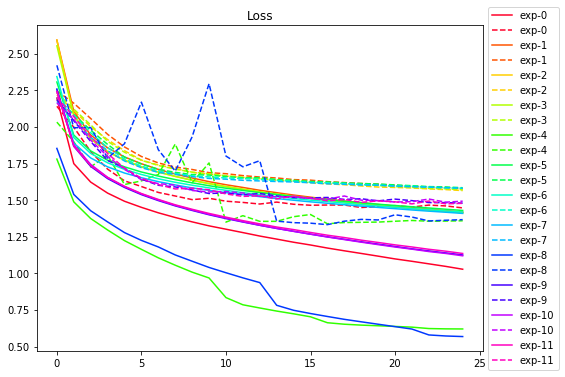

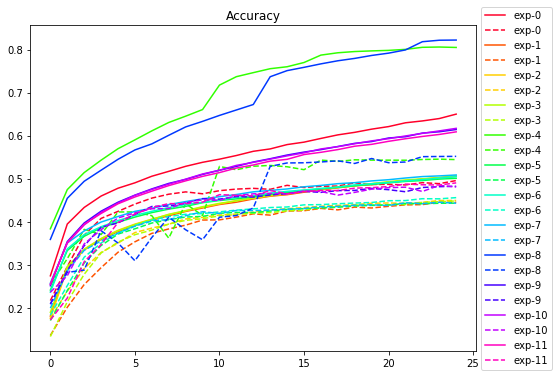

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()